## Title

**Authors:** <br>
Björn Hahn () <br>
Domenico Ferraro ()<br>
Justus Raabe () <br>
Lisa Sachau ()

#### Imported Packages

In [8]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import functions as func


#### Load Data

['./Fotos_einfach\\lion\\l1.jpeg', './Fotos_einfach\\lion\\l10.jpeg', './Fotos_einfach\\lion\\l2.jpeg', './Fotos_einfach\\lion\\l3.jpeg', './Fotos_einfach\\lion\\l4.jpeg', './Fotos_einfach\\lion\\l5.jpeg', './Fotos_einfach\\lion\\l6.jpeg', './Fotos_einfach\\lion\\l7.jpeg', './Fotos_einfach\\lion\\l8.jpeg', './Fotos_einfach\\lion\\l9.jpeg', './Fotos_einfach\\manul\\m1.jpg', './Fotos_einfach\\manul\\m10.jpg', './Fotos_einfach\\manul\\m2.jpg', './Fotos_einfach\\manul\\m3.jpg', './Fotos_einfach\\manul\\m4.jpg', './Fotos_einfach\\manul\\m5.jpg', './Fotos_einfach\\manul\\m6.jpg', './Fotos_einfach\\manul\\m7.jpg', './Fotos_einfach\\manul\\m8.jpg', './Fotos_einfach\\manul\\m9.JPG', './Fotos_einfach\\sand cat\\s1.jpg', './Fotos_einfach\\sand cat\\s10.jpg', './Fotos_einfach\\sand cat\\s2.jpg', './Fotos_einfach\\sand cat\\s3.jpg', './Fotos_einfach\\sand cat\\s4.jpg', './Fotos_einfach\\sand cat\\s5.jpg', './Fotos_einfach\\sand cat\\s6.jpg', './Fotos_einfach\\sand cat\\s7.jpg', './Fotos_einfach\\sa

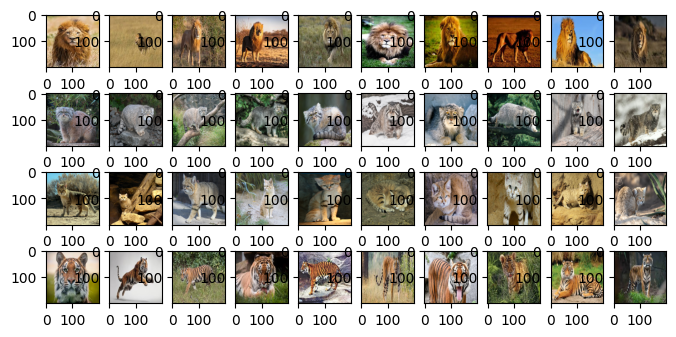

In [9]:
# Get file names
folder_e = './Fotos_einfach'
folder_h = './Fotos_schwierig'
#image_names, categories = read_image_names(filepath)
categories_e, image_names_e, labels_e = func.get_filenames_labels(folder_e)
categories_h, image_names_h, labels_h = func.get_filenames_labels(folder_h)
print(image_names_e)
print(labels_e)
print(categories_e)
print(image_names_h)
print(labels_h)
print(categories_h)
# Load images
input_shape = {
    "height": 200,
    "width": 200,
    "channels": 3
}
images_e = func.read_images(image_names_e, height=input_shape["height"], width=input_shape["width"])
images_h = func.read_images(image_names_h, height=input_shape["height"], width=input_shape["width"])
# Convert images to array
aimages_e = func.images_to_array(images_e)
aimages_h = func.images_to_array(images_h)
print(f'Shape of images array: {aimages_e.shape}')
# Plot images array
fig = plt.figure(figsize=(8, 8))
rows, columns = 8, 10
for i in range(aimages_e.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aimages_e[i, ...])
for i in range(aimages_h.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aimages_h[i, ...])
plt.show()


#### Data Augmentation

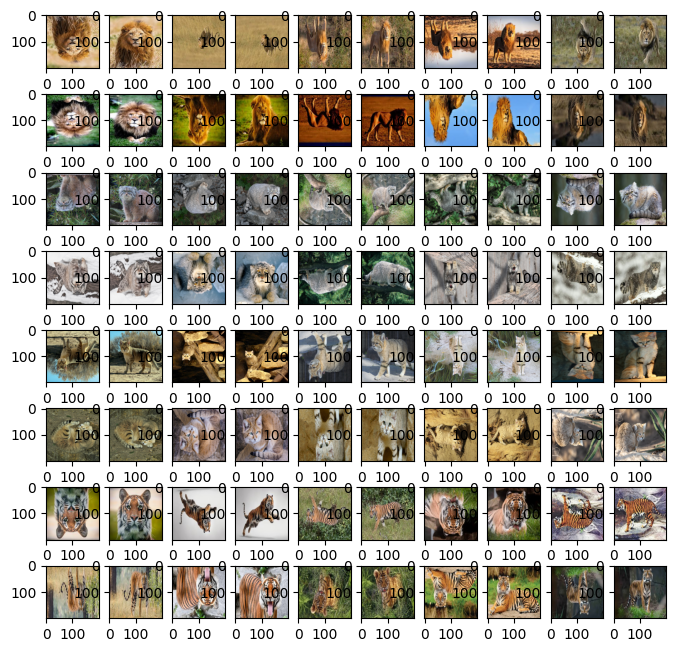

['lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion'
 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion'
 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul'
 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul'
 'manul' 'manul' 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat'
 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat'
 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat'
 'sand cat' 'sand cat' 'sand cat' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger'
 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger'
 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger']


In [ ]:
def augment_images(images, labels):
    aug_images = []
    aug_labels = []
    for i, row in enumerate(images):
        aug_images.append(images[i])
        aug_labels.append(labels[i])
        aug_images.append(np.flipud(row))
        aug_labels.append(labels[i])
    return aug_images, aug_labels

a_images_e, a_labels_e = augment_images(aimages_e, labels_e)
aug_images_e = func.images_to_array(a_images_e)
aug_labels_e = func.images_to_array(a_labels_e)

fig = plt.figure(figsize=(8, 8))
rows, columns = 8, 10
for i in range(aug_images_e.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aug_images_e[i, ...])
plt.show()
print(aug_labels_e)

Encode Labels

In [24]:
print(aug_labels_e)
encoder = OneHotEncoder(categories=[categories_e], sparse_output=False)
y_e = encoder.fit_transform(np.array(aug_labels_e).reshape(-1,1))
y_e

['lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion'
 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion' 'lion'
 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul'
 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul' 'manul'
 'manul' 'manul' 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat'
 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat'
 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat' 'sand cat'
 'sand cat' 'sand cat' 'sand cat' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger'
 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger'
 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger']


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


Training and Test-Split with K-Fold (vielleicht K-Fold auch später, unsicher bei Reihenfolge tbh)

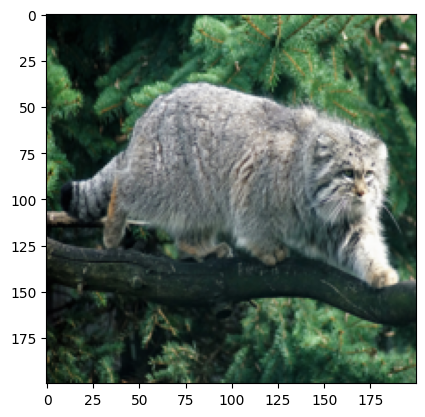

[0. 1. 0. 0.]


In [35]:
def slice_data_in_folds(data, y, k):
    ''' Shuffles and splits the arrays of images and the array of labels in k-folds
        each folds contains a similar amount of elements
    Arguments
    ---------
    data: numpy.ndarray
        A 4D array of images shape: (num_samples, height, width, channels)
    y: numpy array
        A 2D array of the encoded labels shape: (num_samples, num_classes)
    k: int
        The number of folds 
    Returns
    -------
    image_folds : list of numpy.ndarray
        A list containing k arrays each with a set of images
    y_folds: list of numpy.ndarray
        A list containing k arrays each with a set of labels
    '''
    # Shuffle the data and labels in sync
    indices = np.arange(data.shape[0])  # Erzeuge einen Array der Indizes
    np.random.shuffle(indices)  # Shuffle die Indizes zufällig
    
    # Wende die zufällig sortierten Indizes auf die Daten und Labels an
    data = data[indices]
    y = y[indices]

    y_folds = np.array_split(y, k)
    image_folds = np.array_split(data, k)
    return image_folds, y_folds

data = aug_images_e
k = 4
image_folds_e, y_folds_e = slice_data_in_folds(data, y_e, k)


plt.imshow(image_folds_e[3][2])
plt.show()
print(y_folds_e[3][2])

#### Build Model

In [37]:
def build_model(epochs, fold_x_train, fold_y_train, fold_x_val, fold_y_val):
    ''' Builds and trains the model based on a specified amount of epochs.
        Uses fixed propagation, dropout and activation functions. 
        Evaluates the model after training and returns results and accuracy

        Arguments
        ---------
        epochs: int
            The number of epochs used to train the model.

        Returns
        -------
        history : History object
            A dict containing the metrics 'loss' and 'accuracy' for each epoch

        model_accuracy: float
            A float containing the evaluated accuracy of the trained model
    '''
    # CNN model
    inputs = Input(shape=(input_shape.values()))
    hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(inputs)
    hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
    hidden = MaxPooling2D(pool_size=(2,2))(hidden)
    hidden = Dropout(rate=0.25)(hidden)
    hidden = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
    hidden = MaxPooling2D(pool_size=(2,2))(hidden)
    hidden = Dropout(rate=0.25)(hidden)
    hidden = Flatten()(hidden)
    hidden = Dense(units=256, activation='relu')(hidden)
    hidden = Dropout(rate=0.25)(hidden)
    output = Dense(units=y.shape[-1], activation='softmax')(hidden)
    cnn = Model(inputs=inputs, outputs=output, name='CNN_CBP_Class')

    # Configuration of the training process
    cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = cnn.fit(x=fold_x_train, y=fold_y_train, epochs=epochs, batch_size=32)
    # Fit model
    model_accuracy = cnn.evaluate(x=fold_x_val, y=fold_y_val, verbose=0)[1]
    return history, model_accuracy

epoch = 20
eval_accuracy = []
accuracy = []
for i in range(k):
    fold_x_train = np.concatenate([image_folds_e[j] for j in range(k) if j != i], axis=0)
    fold_y_train = np.concatenate([y_folds_e[j] for j in range(k) if j != i], axis=0)
    fold_x_val = image_folds_e[i]
    fold_y_val = y_folds_e[i]
    model, model_accuracy = build_model(epoch, fold_x_train, fold_y_train, fold_x_val, fold_y_val)
    eval_accuracy.append(model_accuracy)
    accuracy.append(max(model.history['accuracy']))
print(eval_accuracy)
print(accuracy)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1951 - loss: 2883.5632
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3042 - loss: 971.8454 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2826 - loss: 173.5973
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3604 - loss: 58.1242
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3799 - loss: 14.2028
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3694 - loss: 12.9181
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5965 - loss: 1.7873
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7389 - loss: 1.5342
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6528 - loss: 1.6563
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5979 - loss: 1.5414
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8049 - loss: 0.5934
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6417 - loss: 1.0516
Epoch 13/20
2/

Plotting of Accuracy and Loss

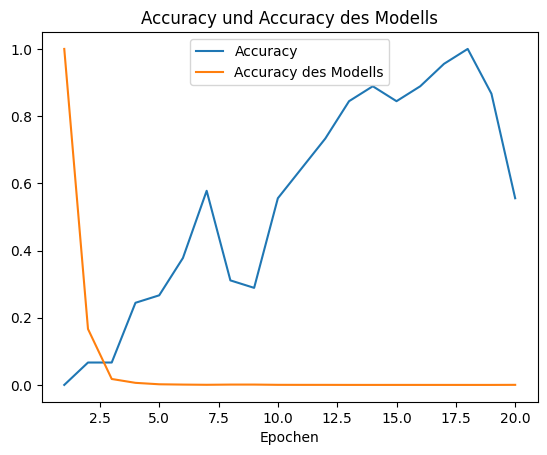

In [ ]:
# noch zu überarbeiten
def minmax(a):
    a = np.asarray(a)
    a = (a - a.min()) / (a.max() - a.min())
    return a

plt.plot(range(1, epoch+1), minmax(model.history['accuracy']))
plt.plot(range(1, epoch+1), minmax(model.history['loss']))
plt.title('Accuracy und Accuracy des Modells')
plt.xlabel('Epochen')
plt.gca().legend(('Accuracy', 'Accuracy des Modells'))
plt.show()

Prediction

In [ ]:
#prediction here